 The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\Anakha\Downloads\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Basic information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


### Summary statistics of the data

In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


### Finding the null values

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

There are no null values in the dataset

### Scatter plot

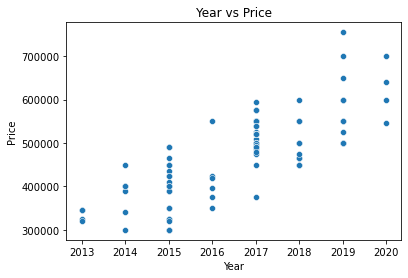

In [6]:
sns.scatterplot(x = "Year", y = "Price",data = data)
plt.title("Year vs Price")
plt.show()

### Correlation between year and price

In [7]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


### Heatmap

<AxesSubplot:>

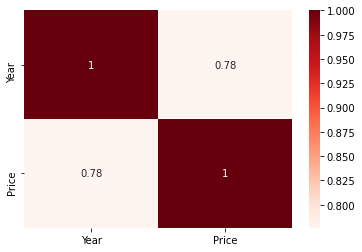

In [8]:
sns.heatmap(data.corr(),cmap="Reds",annot=True)

### Regression Plot

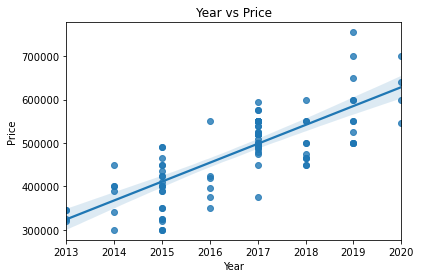

In [9]:
sns.regplot(x = "Year", y = "Price",data = data)
plt.title("Year vs Price")
plt.show()

### Defining the target variable(y) and the independent variable(x)

In [10]:
x=data['Year'].values.reshape(-1,1)
y=data['Price']

### Splitting the dataset into train and test data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

### LINEAR REGRESSION

#### Fitting the model using training set

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Model is used for predicting test values

In [13]:
price_pred = lr.predict(x_test)

#### Finding the R square value and mean squared error

In [14]:
r_sqr = r2_score(y_test, price_pred)
mse = mean_squared_error(y_test,price_pred)
print("The R-squared value is ",r_sqr)
print("Mean squared error is",mse) 

The R-squared value is  0.7561200001046987
Mean squared error is 2369979736.903163


#### Predicting the price for year 2022

In [15]:
x_new=np.array([2022]).reshape(-1,1)
lr.predict(x_new)

array([708308.96590325])

### LASSO REGRESSION

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_r=GridSearchCV(lasso,parameters,cv=5)


#### Fitting the model using training set

In [18]:
lasso_r.fit(x_train,y_train)

C:\Users\Anakha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134188592034.14474, tolerance: 60312157.40019436
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anakha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119393945195.66693, tolerance: 53292729.17474648
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anakha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119075784801.72649, tolerance: 46568000.54394929
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anakha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

#### Finding the best value of alpha

In [19]:
print(lasso_r.best_params_)

{'alpha': 100}


#### Model is used for predicting test values

In [20]:
Price_pred=lasso_r.predict(x_test)

#### Finding the R square value and mean squared error

In [21]:
print('R squared value is:',r2_score(y_test,Price_pred))
print('Mean Squared Error is:',mean_squared_error(y_test,Price_pred))

R squared value is: 0.7559589266666797
Mean Squared Error is: 2371545018.1251664


#### Predicting the price for year 2022

In [22]:
lasso_r.predict(x_new)

array([708093.25264454])

Both linear regression and lasso regression model gives almost the same result but we can see that the r square value of linear regression model is slightly higher than that of lasso regression model. Also the mean squared error of linear regression model is less than that of lasso regression model

Lasso regression is the best choice if we have a large amount of features and we need to reduce the number of features in the model in order to simplify and make it more meaningful. But here we have only one feature which is the year that is why linear regression showed slightly better results